## Regresión logística multiclase


## Importar librerías

In [210]:
# import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()

## Carga de datos

In [211]:
df = pd.read_csv('/home/roy/regresion_logistica/data/Dry_Bean.csv') # este data nos da tipos de frijol en una variable

In [212]:
df.head(5)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [213]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [214]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


## Drop duplicates

In [215]:
df.drop_duplicates(inplace=True)

## Manejo de datos nulos

In [216]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

## undersampling

no tenemos los mismos ejemplos para todas las clases esto afectara el modelo 

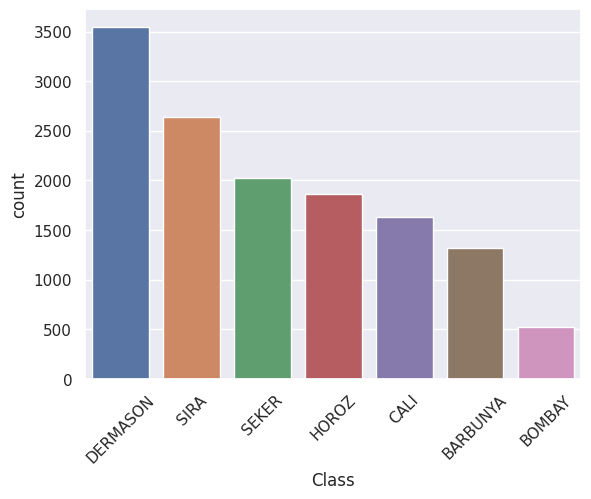

In [217]:

class_counts = df['Class'].value_counts()
sns.barplot(x=class_counts.index, y=class_counts)
plt.xticks(rotation=45)
plt.show()



esto se resuelve reduciendo todas las clases ala clase minima con undersampling 

contra :se estan eliminando valores utiles 

otro metodo 
## Generación de datos sintéticos
empezar a crear ejemplos con los mismos parametros para maximisar todas las variables e igualarlas ala de la columna mas alta con mas valores 

contra : estamos creando ejemplo que no son ciertos

In [218]:

# para este caso se utilizara undersampling porque tenermos suficientes valores  
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [219]:
X = df.drop('Class',axis=1)
y = df.Class

In [220]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653247,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [221]:
pd.DataFrame(y) # dejamos a y con la variable que queremos predecir

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [222]:
X_over , y_over = undersample.fit_resample(X,y) # se hizo el undersample para tener todas las variables con el mismo valor 

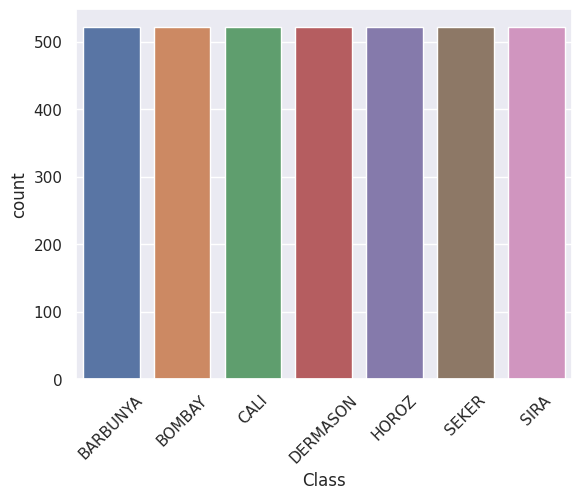

In [223]:
sns.countplot(x=y_over, data=X_over)
plt.xticks(rotation=45)
plt.show()

In [224]:
df.shape

(13543, 17)

In [225]:
X_over.shape

(3654, 16)

## Conversión a numéricos

In [226]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [227]:
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'], [1,2,3,4,5,6,7], inplace=True)

In [228]:
list(np.unique(y_over))

[1, 2, 3, 4, 5, 6, 7]

In [229]:
pd.DataFrame(y_over)

,Class
2754,1
2506,1
2267,1
2449,1
2076,1
...,...
8692,7
7578,7
7924,7
9972,7


## Análisis exploratorio de datos

### Corrrelations

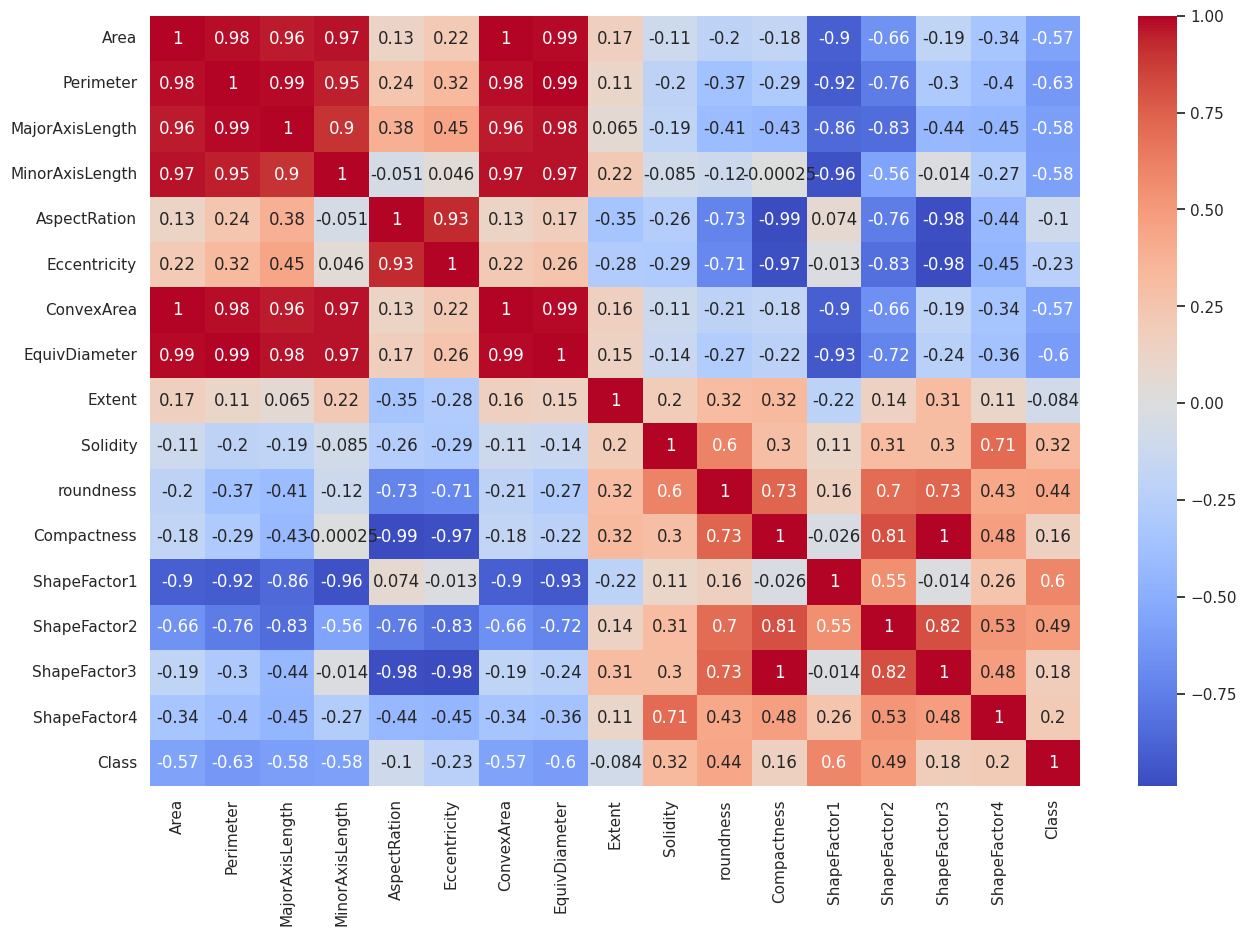

In [230]:
df_dea = X_over.copy() # al final hize un copy para visualizar, esto es una buena practica 
fig = plt.figure(figsize=(15,10))
df_dea['Class'] = y_over
sns.heatmap(df_dea.corr(),annot=True,cmap='coolwarm')
plt.show()
# tenemos un erro claro de agregar la columna Class al dataset de X_over 

eliminamos las variable que estan altamente correlacionadas para evitar el overfitting
es importante conocer el negocio antes de eliminar variables 

In [231]:
# X_over.drop(['ConvexArea','EquivDiameter'],axis=1,inplace=True)


In [232]:
# X_over = X_over.drop(columns='Class') # se corrige el error si no se hace copy 

## Visualización de datos

In [233]:
# sns.pairplot(df_dea, hue='Class') tarda mucho

## Split y escalamiento de datos

In [234]:
X_train, X_test , y_train , y_test = train_test_split(X_over,y_over,test_size=0.2, random_state=42,shuffle=True)

X_over y y_over: Son los dos grupos de datos que tenemos. "X_over" contiene información sobre diferentes características de frijoles (por ejemplo, color, tamaño) y "y_over" contiene las categorías a las que pertenece cada frijol (por ejemplo, "BARBUNYA", "BOMBAY").

test_size=0.2: Este parámetro significa que queremos reservar el 20% de nuestros datos para la prueba, mientras que el 80% se usará para entrenar el modelo.

random_state=42: Esto garantiza que cada vez que ejecutemos el código, obtendremos la misma división de datos para entrenamiento y prueba. El número "42" es solo un número aleatorio utilizado para esto.

shuffle=True: Cuando dividimos los datos, queremos que estén mezclados para que nuestro modelo no se "acostumbre" a un patrón específico de datos y pueda aprender de manera más general.

***Finalmente, después de ejecutar este código, obtendremos cuatro grupos de datos:***

X_train: Contiene las características de frijoles que usaremos para entrenar el modelo.

X_test: Contiene características de frijoles que usaremos para probar qué tan bien funciona el modelo.

y_train: Contiene las categorías de frijoles correspondientes a las características en "X_train", que usaremos para entrenar el modelo.

y_test: Contiene las categorías de frijoles correspondientes a las características en "X_test", que usaremos para evaluar el rendimiento del modelo en datos nunca antes vistos.

In [235]:
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

## Modelo multiclase

In [236]:
def logistic_model(C,solver,multiclass): 
    Logistic_Regression_model =LogisticRegression(random_state=42,solver=solver,multi_class=multiclass, n_jobs=-1,C=C)
    return Logistic_Regression_model

random_state=42: Este argumento establece una semilla (número aleatorio) para que el proceso sea reproducible. Al usar un valor específico (en este caso, 42), obtendremos los mismos resultados cada vez que ejecutemos el código.

solver=solver: Este argumento controla el algoritmo que se utilizará para optimizar los parámetros del modelo. El valor de solver determina cómo el modelo encontrará los mejores coeficientes para ajustarse a los datos. Puede ser uno de los siguientes valores:

'liblinear': Es un algoritmo adecuado para conjuntos de datos pequeños.
'lbfgs': Es un algoritmo adecuado para conjuntos de datos grandes.
multi_class=multiclass: Este argumento especifica cómo se manejará la clasificación multiclase (cuando hay más de dos categorías). Puede tener los siguientes valores:

'ovr': Utiliza el esquema "One-vs-Rest" para clasificación multiclase.
'multinomial': Utiliza la pérdida de entropía cruzada multinomial para la clasificación multiclase.
n_jobs=-1: Este argumento controla el número de núcleos de CPU que se utilizarán para el entrenamiento del modelo. -1 significa que se utilizarán todos los núcleos disponibles para acelerar el proceso de entrenamiento.

C=C: Este argumento controla el parámetro de regularización del modelo. La regularización es una técnica que ayuda a evitar el sobreajuste (overfitting) en el modelo. Un valor más grande de C indica menos regularización, lo que permitirá que el modelo se ajuste más a los datos de entrenamiento. Un valor más pequeño de C indica más regularización, lo que previene el sobreajuste.

In [237]:
model = logistic_model(1,'saga','multinomial')
model.fit(X_train,y_train)
prediction = model.predict(X_test)
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))

[[118   0   5   0   1   1   3]
 [  0  98   0   0   0   0   0]
 [  5   0  97   0   0   0   1]
 [  0   0   0  90   0   5  10]
 [  0   0   4   1  91   0   0]
 [  3   0   0   0   0  84   4]
 [  0   0   1   6   6   0  97]]
0.9233926128590971


/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [238]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=5)

results = cross_val_score(model, X_test, y_test, cv=kfold)
print(results.mean())

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9234181343770385


/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [239]:
multiclass = ['ovr','multinomial']
solver_list = ['libinear','newton-cg','lbfgs','sag','saga']
scores = []
params = []
for i in multiclass:
    for j in solver_list:
        try:
            model = logistic_model(1,j,i)
            model.fit(X_train,y_train)
            prediction = model.predict(X_test)
            params.append(i + ""+j)
            accuracy = accuracy_score(y_test,prediction)
            scores.append(accuracy)
        except:
            None

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/roy/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means t

## Evaluación de resultados

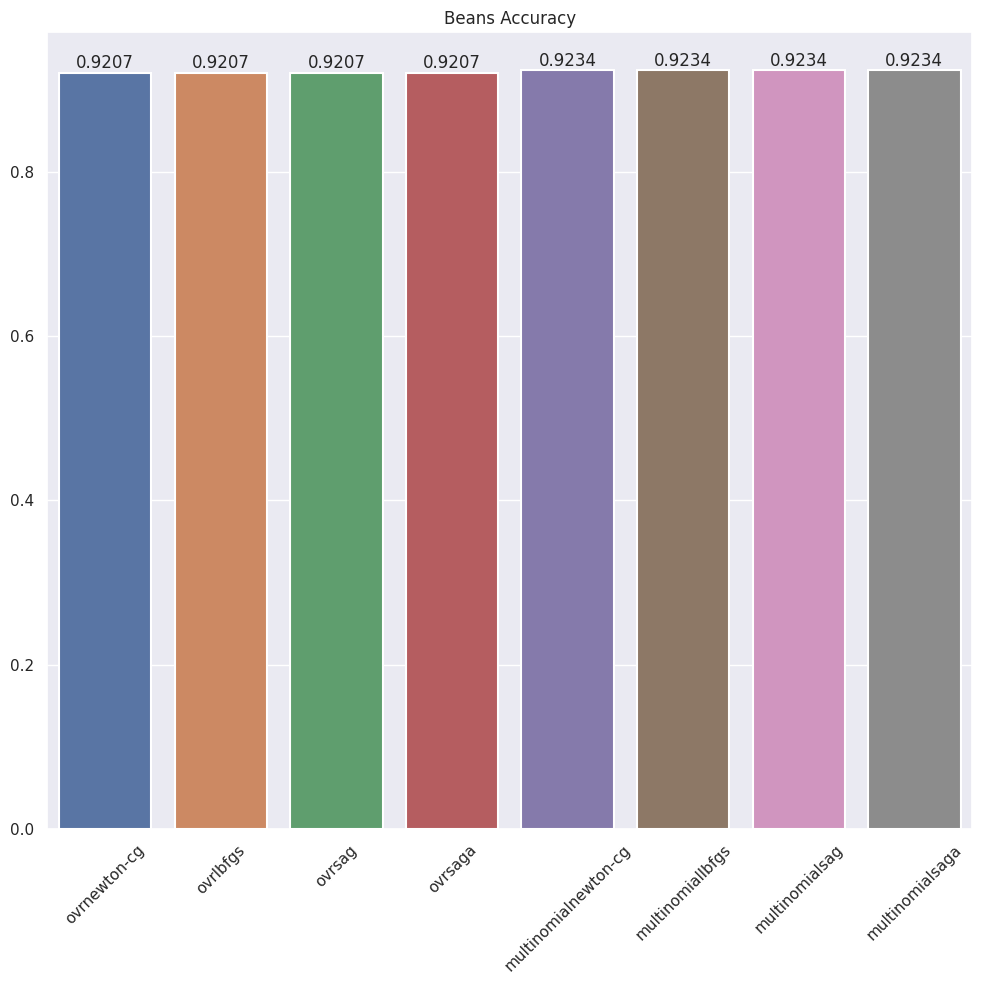

In [240]:

rounded_scores = [round(score, 4) for score in scores]

fig = plt.figure(figsize=(10, 10))
sns.barplot(x=params, y=scores, linewidth=1.5)  # Adjust the linewidth as needed
plt.title('Beans Accuracy')
plt.xticks(rotation=45)

# Add rounded annotations (scores) to each bar
for index, value in enumerate(rounded_scores):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()  # Add this to improve the spacing between elements
plt.show()

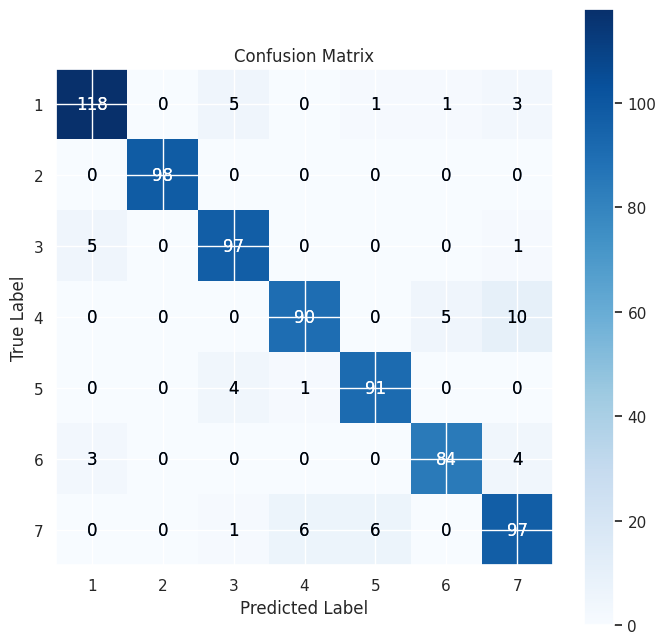

In [246]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, prediction, labels=model.classes_)


fig, ax = plt.subplots(figsize=(8, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)


disp.plot(cmap=plt.cm.Blues, ax=ax)

# Agregar etiquetas a los ejes
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')


for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.show()